EXERCISE-1 

Q. We have the following coin values 1p, 2p, 5p, 10p, 20p, 50p, 100p, 200p.What is the minimum number of coins to make a 93p.

-> The given coins are: 1p, 2p, 5p, 10p, 20p, 50p, 100p, 200p. 

Target Amount: 93p

-50p fits in 93p

93p-50p = 43p

-20p fits in 43p

43p-20p = 23

-23p fits in 20p

23p-20p = 3p

-2p fits in 3p

3p-2p = 1p

-1p fits in 1p

1p-1p = 0

Minimum number of coints to make a 93p= 5

Coin used= 50p, 20p, 20p, 2p, 1p




                    Exercise 2                                                

Write a  step-by step instruction to find the min number of coins . Write your solution in jupyter noteboo as a solution to exercie 2

Step 1: Start with the target amount

Step 2: Sort all coin values from largest to smallest. 

Step 3: Subtract that coin from the amount.

Step 4: Repeat the same coin if it still fits.

Step 5: When it no longer fits, move to the next smaller coin.

Step 6: Continue until the amount necome 0.

Step 7: Count how many coins were used. This is the minimum number of coin.






Exercise-3

In [1]:
def coin_change(coins,amount):
    coins.sort(reverse=True) #Sortthe coin in descending order.
    coin_count=0 #Variable to keep track of the total number of coins used
    change= [] #List to store the coins used

    for coin in coins:
        while amount >= coin:
            amount -= coin
            coin_count += 1
            change.append(coin)
     
    if amount == 0:
        print(f"Minimun number of coins required: {coin_count}")
        print("Coins used:", change)
    else:
        print("Not possible to get the desired change with the coins. ")

coins= [1, 2, 5, 10, 20, 50, 100, 200] #List of available coins
amount = 93 #Amount for which we need to find the minimum number of the coins


coin_change(coins, amount)


Minimun number of coins required: 5
Coins used: [50, 20, 20, 2, 1]


Exercise 4

Experiment with at least different coins and 3 different sum amounts

In [2]:
#  Experiment-1

coins= [ 50, 100, 200] #List of available coins
amount = 73 #Amount for which we need to find the minimum number of the coins

coin_change(coins, amount)


Not possible to get the desired change with the coins. 


In [3]:
# Experiment-2

coins= [4 , 2, 20, 30, 40, 200] #List of available coins
amount = 22 #Amount for which we need to find the minimum number of the coins

coin_change(coins, amount)


Minimun number of coins required: 2
Coins used: [20, 2]


In [4]:
# Experiment -3

coins= [ 1, 5, 30, 100, 150, 200] #List of available coins
amount = 250 #Amount for which we need to find the minimum number of the coins

coin_change(coins, amount)


Minimun number of coins required: 6
Coins used: [200, 30, 5, 5, 5, 5]


Exercise 5

Trace the previous script and write a description of it

Trace of script

1. Input: coins = [1, 2, 5, 10, 20, 50, 100, 200], amount =93

2. Sort coins in descending: [200, 100, 50, 20, 10, 5, 2, 1]

3. Loop through coins and subtract from amount:

* 50 -> remaning 43

* 20 -> remaning 23

* 20 -> remaning 3

* 2 -> remaning 1

* 1 -> remaning 0

4. Coins used: [50, 20, 20, 2, 1]

5. Total coins: 5
   
Description:

The script finds the minimum number of coins for a given amount. it sort coins in descending order and repeadely subtracts the largest coins possible, keeping track of the coin used. if the exact amount is reached, it prints the coins used and total coins, otherwise it prints is not possible


Exercise 6

Is there anything you would chnage in to enhance it.

Yes, we can add a check or use dynamic programming to handle cases where the greedy method may not give the minimum coins.

Exercise 7

In [5]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx


# Class representing a node in the graph
class Node:
    def __init__(self, name, heuristic_cost):
      self.name = name 
      self.heuristic_cost=heuristic_cost
      self.adjacent ={}
      self.parent=None
      self.g_cost= float("inf")
    
    def add_neighbor(self, neighbor, cost):
       self.adjacent[neighbor]= cost
    
    def __lt__(self, other):
       return self.g_cost + self.heuristic_cost < other.g_cost + other.heuristic_cost


In [6]:
# A* search algorithm 
def astar_search(start, goal): 
    open_list = [] 
    closed_set = set() 
 
    start.g_cost = 0 
    heapq.heappush(open_list, start) 
 
    while open_list: 
        current_node = heapq.heappop(open_list) 
 
        if current_node == goal: 
            path = [] 
            while current_node is not None: 
                path.append(current_node.name) 
                current_node = current_node.parent 
            return path[::-1] 
 
        closed_set.add(current_node) 
 
        for neighbor, cost in current_node.adjacent.items(): 
            tentative_g_cost = current_node.g_cost + cost 
 
            if neighbor in closed_set and tentative_g_cost >= neighbor.g_cost: 
                continue 
 
            if tentative_g_cost < neighbor.g_cost or neighbor not in open_list: 
                neighbor.g_cost = tentative_g_cost 
                neighbor.parent = current_node 
                if neighbor not in open_list: 
                    heapq.heappush(open_list, neighbor) 
    return None 

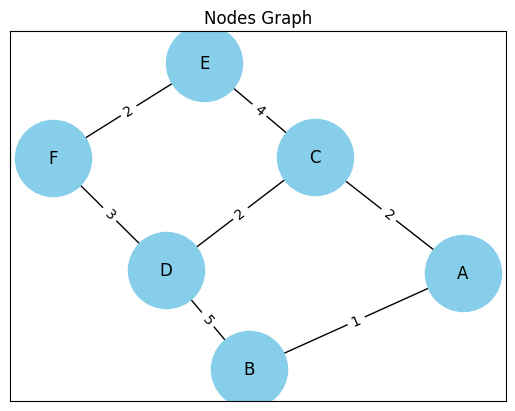

In [7]:
# Creating nodes 
A = Node("A", 5) 
B = Node("B", 4) 
C = Node("C", 3) 
D = Node("D", 2) 
E = Node("E", 1) 
F = Node("F", 0) 
 
# Adding neighbors and their costs 
A.add_neighbor(B, 1) 
A.add_neighbor(C, 2) 
B.add_neighbor(D, 5) 
C.add_neighbor(D, 2) 
C.add_neighbor(E, 4) 
D.add_neighbor(F, 3) 
E.add_neighbor(F, 2) 
 
# Visualization without the solution 
G = nx.Graph() 
edges = [(A.name, B.name, {'weight': 1}), (A.name, C.name, {'weight': 2}), 
         (B.name, D.name, {'weight': 5}), (C.name, D.name, {'weight': 2}), 
         (C.name, E.name, {'weight': 4}), (D.name, F.name, {'weight': 3}), 
         (E.name, F.name, {'weight': 2})] 
G.add_edges_from(edges) 
 
pos = nx.spring_layout(G) 
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, 
node_color='skyblue') 
labels = nx.get_edge_attributes(G, 'weight') 
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) 
 
plt.title('Nodes Graph') 
plt.show() 

In [8]:
# Running the A* search algorithm
path = astar_search(A, F)
print("A* path:", path)

A* path: ['A', 'C', 'D', 'F']


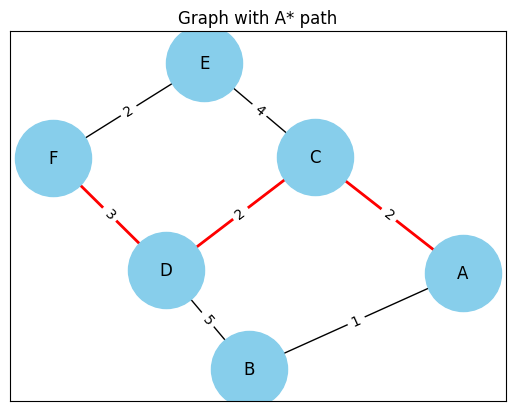

In [9]:
# Visualization with A* path 
plt.title('Graph with A* path') 
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, 
node_color='skyblue') 
nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i + 1]) for i in 
range(len(path) - 1)], edge_color='r', width=2) 
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) 
plt.show()

Exercise 8

Update the script to emulate the following graph, and let the starting point be in sunderland  and the end point to be Washington

In [10]:

class Node:
    def __init__(self, name, heuristic_distance):
        self.name = name
        self.heuristic_distance = heuristic_distance
        self.adjacent = {}
        self.parent = None
        self.g_distance = float("inf")

    def add_neighbor(self, neighbor, distance):
        self.adjacent[neighbor] = distance

    def __lt__(self, other):
        return (self.g_distance + self.heuristic_distance) < (other.g_distance + other.heuristic_distance)

    def __hash__(self):
        return hash(self.name)

    def __eq__(self, other):
        return self.name == other.name



In [11]:
def astar_search(start, goal): 
    open_list = [] 
    closed_set = set() 
 
    start.g_distance = 0 
    heapq.heappush(open_list, start) 
 
    while open_list: 
        current_node = heapq.heappop(open_list) 
 
        if current_node == goal: 
            path = [] 
            while current_node is not None: 
                path.append(current_node.name) 
                current_node = current_node.parent 
            return path[::-1] 
 
        closed_set.add(current_node) 
 
        for neighbor, distance in current_node.adjacent.items(): 
            tentative_g_distance = current_node.g_distance + distance
 
            if neighbor in closed_set and tentative_g_distance >= neighbor.g_distance: 
                continue 
 
            if tentative_g_distance < neighbor.g_distance or neighbor not in open_list: 
                neighbor.g_distance = tentative_g_distance 
                neighbor.parent = current_node 
                if neighbor not in open_list: 
                    heapq.heappush(open_list, neighbor) 
    return None 

In [12]:
# Create nodes

Newcastle = Node("Newcastle", 4) 
SouthShields = Node("SouthShields", 3) 
Sunderland = Node("Sunderland", 2) 
Washington = Node("Washington", 0)
Durham = Node("Durham", 1) 
Peterlee = Node("Peterlee", 3)

# Adding neighbors

Newcastle.add_neighbor(SouthShields, 2)
SouthShields.add_neighbor(Newcastle, 2)
Newcastle.add_neighbor(Washington, 2)
Washington.add_neighbor(Newcastle, 2)
Newcastle.add_neighbor(Sunderland, 3)
Sunderland.add_neighbor(Newcastle, 3)
SouthShields.add_neighbor(Sunderland, 2)
Sunderland.add_neighbor(SouthShields, 2)
Washington.add_neighbor(Durham, 3)
Durham.add_neighbor(Washington, 3)
Sunderland.add_neighbor(Peterlee, 3)
Peterlee.add_neighbor(Sunderland, 3)
Durham.add_neighbor(Peterlee, 2)
Peterlee.add_neighbor(Durham, 2)

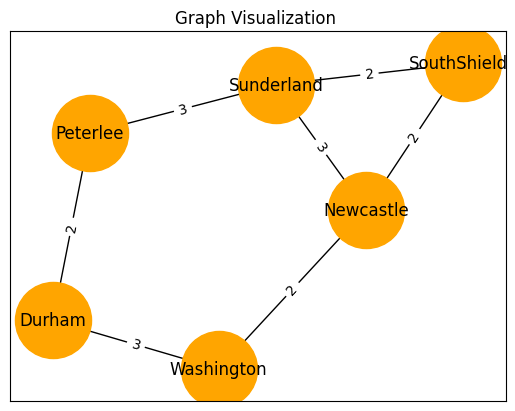

In [13]:
# Network visulation
G = nx. Graph()

edges = [
    (Newcastle.name, SouthShields.name, {'weight': 2}),
    (Newcastle.name, Washington.name, {'weight': 2}),
    (Newcastle.name, Sunderland.name, {'weight': 3}),
    (SouthShields.name, Sunderland.name, {'weight': 2}),
    (Washington.name, Durham.name, {'weight': 3}),
    (Sunderland.name, Peterlee.name, {'weight': 3}),
    (Durham.name, Peterlee.name, {'weight': 2})
]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed =42)

nx.draw_networkx(G, pos, with_labels= True, node_size=3000, node_color='Orange')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Graph Visualization ")
plt.show()


In [14]:
path = astar_search(Sunderland, Washington) 
print("A* path:", path) 

A* path: ['Sunderland', 'Newcastle', 'Washington']


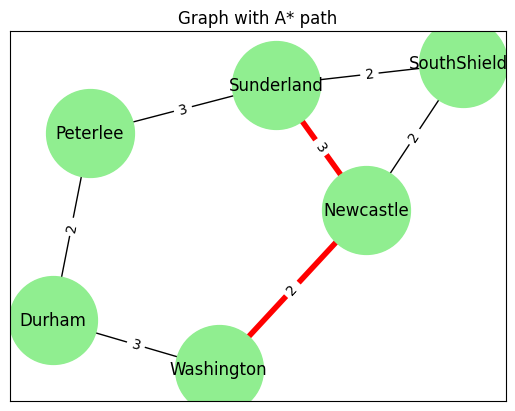

In [15]:
#  Visualization with A* path 
plt.title('Graph with A* path') 
nx.draw_networkx(G, pos, with_labels=True, node_size=4000, 
node_color='lightgreen') 
nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i + 1]) for i in 
range(len(path) - 1)], edge_color='r', width=4) 
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) 
plt.show() 

Exercise -9 

Use a maps website to get the actual distance between cities and update 
your script. Find the best path to get from Sunderland to Washington.

In [16]:
# Create nodes

Newcastle = Node("Newcastle", 16) 
SouthShields = Node("SouthShields", 14) 
Sunderland = Node("Sunderland", 11) 
Washington = Node("Washington", 0)
Durham = Node("Durham", 21) 
Peterlee = Node("Peterlee", 23)

# Adding neighbors (acutal distance)

Newcastle.add_neighbor(SouthShields, 19)
SouthShields.add_neighbor(Newcastle, 19)

Newcastle.add_neighbor(Washington, 16)
Washington.add_neighbor(Newcastle, 16)

Newcastle.add_neighbor(Sunderland, 23)
Sunderland.add_neighbor(Newcastle, 23)

SouthShields.add_neighbor(Sunderland, 13)
Sunderland.add_neighbor(SouthShields, 13)

Washington.add_neighbor(Durham, 19)
Durham.add_neighbor(Washington, 19)

Sunderland.add_neighbor(Peterlee,20)
Peterlee.add_neighbor(Sunderland, 20)

Durham.add_neighbor(Peterlee, 21)
Peterlee.add_neighbor(Durham, 21)

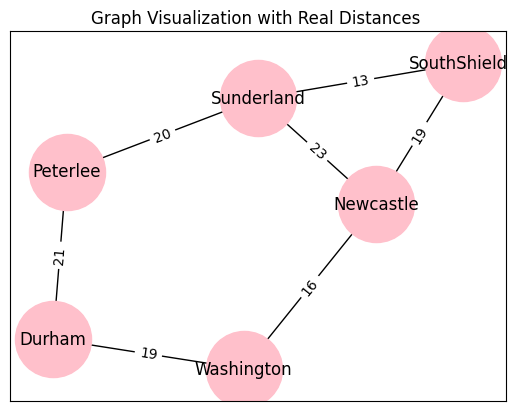

In [17]:
# Network visualization using real distances
G = nx.Graph()

edges = [
    (Newcastle.name, SouthShields.name, {'weight': 19}),
    (Newcastle.name, Washington.name, {'weight': 16}),
    (Newcastle.name, Sunderland.name, {'weight': 23}),
    (SouthShields.name, Sunderland.name, {'weight': 13}),
    (Washington.name, Durham.name, {'weight': 19}),
    (Sunderland.name, Peterlee.name, {'weight': 20}),
    (Durham.name, Peterlee.name, {'weight': 21})
]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)  # layout for nice structure

nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color='Pink')

# Show weight labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Graph Visualization with Real Distances ")
plt.show()


In [18]:
path = astar_search(Sunderland, Washington) 
print("A* path:", path) 

A* path: ['Sunderland', 'Newcastle', 'Washington']


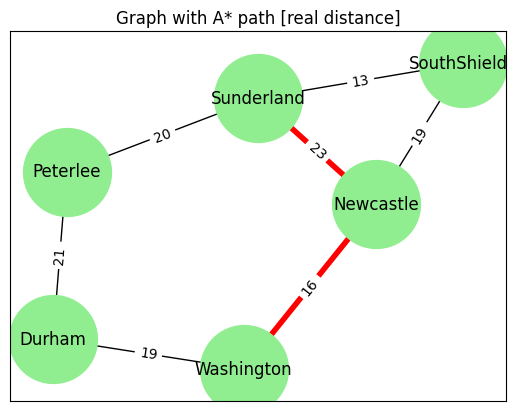

In [19]:
#  Visualization with A* path 
plt.title('Graph with A* path [real distance]') 
nx.draw_networkx(G, pos, with_labels=True, node_size=4000, 
node_color='lightgreen') 
nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i + 1]) for i in 
range(len(path) - 1)], edge_color='r', width=4) 
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) 
plt.show() 

Exercise-10 

Experiment with 3 different starting and ending points

Shortest path from Newcastle to Washington:['Newcastle', 'Washington'] (Distance: 16 km)
Shortest path from Durham to Newcastle:['Durham', 'Washington', 'Newcastle'] (Distance: 35 km)
Shortest path from SouthShields to Durham:['SouthShields', 'Sunderland', 'Peterlee', 'Durham'] (Distance: 54 km)


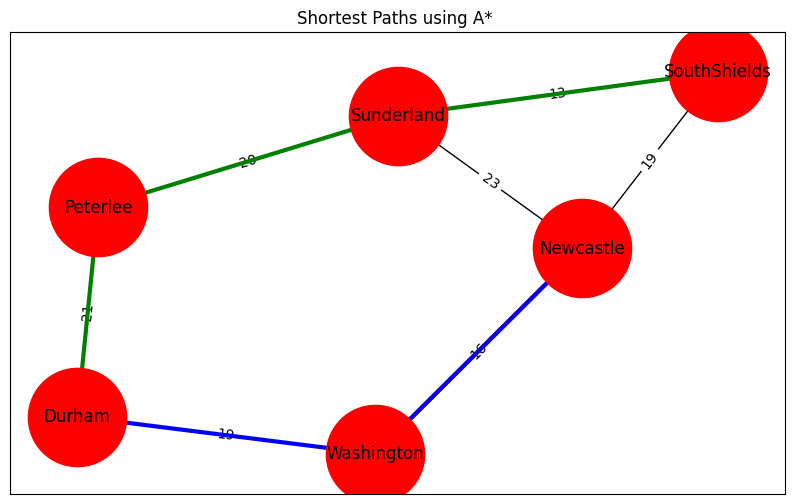

In [ ]:


# --- Graph with real distances ---
G = nx.Graph()

edges = [
    ("Newcastle", "SouthShields", {'weight': 19}),
    ("Newcastle", "Washington", {'weight': 16}),
    ("Newcastle", "Sunderland", {'weight': 23}),
    ("SouthShields", "Sunderland", {'weight': 13}),
    ("Washington", "Durham", {'weight': 19}),
    ("Sunderland", "Peterlee", {'weight': 20}),
    ("Durham", "Peterlee", {'weight': 21})
]

G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=42)

# --- A* search function ---
def run_a_star(start, goal):
    path = nx.astar_path(G, start, goal, weight='weight')
    length = nx.astar_path_length(G, start, goal, weight='weight')
    print(f"Shortest path from {start} to {goal}:{path} (Distance: {length} km)")
    return path

# 3 different starting and ending point

routes = [
    ("Newcastle", "Washington"),
    ("Durham", "Newcastle"),
    ("SouthShields", "Durham")
]

# Draw graph and highlight paths
plt.figure(figsize=(10,6))
nx.draw_networkx(G, pos, with_labels=True, node_size=5000, node_color='Red')

# Show weights
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Run A* for each route and highlight
colors = ['red', 'blue', 'green']
for i, (start, goal) in enumerate(routes):
    path = run_a_star(start, goal)
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color=colors[i])

plt.title("Shortest Paths using A* ")
plt.show()


Exercise -11

In [1]:
import random
# Number of individuals in each generation
POPULATION_SIZE =  4
# Valid genes
GENES = '''01'''
# Targeting string to be generated
TARGET = "001010"

In [ ]:
class Individual(object):
#Class representing individual in population
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(self):
        #create random genes for mutation
        global GENES
        gene = random.choice(GENES)
        return gene

    @classmethod
    def create_gnome(self):
        #create chromosome or string of genes
        global TARGET
        gnome_len = len(TARGET)
        return [self.mutated_genes() for _ in range(gnome_len)]

    def mate(self, par2):
        #Perform mating and produce new offspring
        # chromosome for offspring
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            # random probability
            prob = random.random()
            # if prob is less than 0.45, insert gene from parent 1
            if prob < 0.45:
                child_chromosome.append(gp1)
            # if prob is between 0.45 and 0.90, insert gene from parent 2
            elif prob < 0.90:
                child_chromosome.append(gp2)
            # otherwise insert random gene(mutate),
            # for maintaining diversity
            else:
                child_chromosome.append(self.mutated_genes())
        # create new Individual(offspring) using generated chromosome for offspring
        return Individual(child_chromosome)
 
    def cal_fitness(self):
        ''' Calculate fitness score, it is the number of characters in string
which differ from target string. '''
        global TARGET
        fitness = 0
        for gs, gt in zip(self.chromosome, TARGET):
            if gs != gt: fitness+= 1
        return fitness

In [3]:
# Driver code
def main():
    global POPULATION_SIZE
    #current generation
    generation = 1
    found = False
    population = []
    # create initial population
    for _ in range(POPULATION_SIZE):
                gnome = Individual.create_gnome()
                population.append(Individual(gnome))
    while not found:
        # sort the population in increasing order of fitness score
        population = sorted(population, key = lambda x:x.fitness)
        # if the individual having lowest fitness score ie.
        # 0 then we know that we have reached to the target
        # and break the loop
        if population[0].fitness <= 0:
            found = True
            break
        # Otherwise generate new offsprings for new generation
        new_generation = []
        # Perform Elitism, that mean 10% of fittest population
        # goes to the next generation
        s = int((10*POPULATION_SIZE)/100)
        new_generation.extend(population[:s])
        # From 50% of fittest population, Individuals
        # will mate to produce offspring
        s = int((90*POPULATION_SIZE)/100)
        for _ in range(s):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)

        population = new_generation

        print("Generation: {}\tString: {}\tFitness: {}".format(generation,
            "".join(population[0].chromosome),
            population[0].fitness))
        generation += 1
    print("Generation: {}\tString: {}\tFitness: {}".format(generation,
        "".join(population[0].chromosome),
        population[0].fitness))
if __name__ == '__main__':
    main()

Generation: 1	String: 000110	Fitness: 2
Generation: 2	String: 000110	Fitness: 2
Generation: 3	String: 000110	Fitness: 2
Generation: 4	String: 000110	Fitness: 2
Generation: 5	String: 001110	Fitness: 1
Generation: 6	String: 001110	Fitness: 1
Generation: 7	String: 011110	Fitness: 2
Generation: 8	String: 001110	Fitness: 1
Generation: 9	String: 001110	Fitness: 1
Generation: 10	String: 001110	Fitness: 1
Generation: 11	String: 011110	Fitness: 2
Generation: 12	String: 000100	Fitness: 3
Generation: 13	String: 000110	Fitness: 2
Generation: 14	String: 011110	Fitness: 2
Generation: 15	String: 001110	Fitness: 1
Generation: 16	String: 011110	Fitness: 2
Generation: 17	String: 011100	Fitness: 3
Generation: 18	String: 011110	Fitness: 2
Generation: 19	String: 001110	Fitness: 1
Generation: 20	String: 001110	Fitness: 1
Generation: 21	String: 000100	Fitness: 3
Generation: 22	String: 001010	Fitness: 0
Generation: 23	String: 001010	Fitness: 0


Exercise 12:

 Change the problem to have all the alphabets and update the target value to 
be ‘Welcome to AI’

In [8]:
import random
import string    # To get alphabets

# Number of individuals in each generation
POPULATION_SIZE = 100   # Increased size (more variation)
GENES = string.ascii_letters + ' '  # a-z, A-Z and space
# Target string to be generated
TARGET = "Welcome to AI"

In [11]:

class Individual(object):
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(self):
        # create random genes for mutation
        gene = random.choice(GENES)
        return gene

    @classmethod
    def create_gnome(self):
        # create chromosome of same length as TARGET
        return [self.mutated_genes() for _ in range(len(TARGET))]

    def mate(self, par2):
        # Perform mating and produce offspring
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            prob = random.random()

            if prob < 0.45:
                child_chromosome.append(gp1)
            elif prob < 0.90:
                child_chromosome.append(gp2)
            else:
                child_chromosome.append(self.mutated_genes())
        return Individual(child_chromosome)

    def cal_fitness(self):
        # Count number of characters different from target
        fitness = 0
        for gs, gt in zip(self.chromosome, TARGET):
            if gs != gt:
                fitness += 1
        return fitness

In [12]:
def main():
    generation = 1
    found = False

    population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]

    while not found:
        population = sorted(population, key=lambda x: x.fitness)

        if population[0].fitness == 0:
            found = True
            break

        new_generation = []

        # Elitism: keep top 10%
        s = int((10 * POPULATION_SIZE) / 100)
        new_generation.extend(population[:s])

        # Crossover: remaining 90%
        s = int((90 * POPULATION_SIZE) / 100)
        for _ in range(s):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)

        population = new_generation

        print(f"Generation: {generation}\tString: {''.join(population[0].chromosome)}\tFitness: {population[0].fitness}")
        generation += 1

    print("\n🎯 Target Reached!")
    print(f"Generation: {generation}\tString: {''.join(population[0].chromosome)}\tFitness: {population[0].fitness}")


if __name__ == "__main__":
    main()

Generation: 1	String: EmlEodJLmROsi	Fitness: 11
Generation: 2	String: AmlwoyJ HROxi	Fitness: 10
Generation: 3	String: AmlwoyJ HROxi	Fitness: 10
Generation: 4	String: pvlcofeUmydKU	Fitness: 9
Generation: 5	String: SmlCoRQ HoHxI	Fitness: 8
Generation: 6	String: SelComq HdusI	Fitness: 7
Generation: 7	String: SelComq HdusI	Fitness: 7
Generation: 8	String: WelsodJ yohsI	Fitness: 6
Generation: 9	String: WDlMofe toSFI	Fitness: 5
Generation: 10	String: Wolcofe toSFI	Fitness: 4
Generation: 11	String: Wolcofe toSFI	Fitness: 4
Generation: 12	String: Wolcofe toSFI	Fitness: 4
Generation: 13	String: Welcome yoSAI	Fitness: 2
Generation: 14	String: Welcome yoSAI	Fitness: 2
Generation: 15	String: Welcome yoSAI	Fitness: 2
Generation: 16	String: Welcome toGAI	Fitness: 1
Generation: 17	String: Welcome toGAI	Fitness: 1
Generation: 18	String: Welcome toGAI	Fitness: 1

🎯 Target Reached!
Generation: 19	String: Welcome to AI	Fitness: 0


Exercise 13: 

 Update the script to have so that it would measure the duration to find the 
solution. 

In [13]:
import random
import string
import time #for measuring the duration

POPULATION_SIZE = 100
GENES = string.ascii_letters + ' '
TARGET = "Welcome to AI"


In [17]:

def main():
    start_time = time.time()  #  START measuring time

    generation = 1
    found = False

    population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]

    while not found:
        population = sorted(population, key=lambda x: x.fitness)

        if population[0].fitness == 0:
            found = True
            break

        new_generation = []
        s = int((10 * POPULATION_SIZE) / 100)
        new_generation.extend(population[:s])

        s = int((90 * POPULATION_SIZE) / 100)
        for _ in range(s):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)

        population = new_generation

        print(f"Generation: {generation}\tString: {''.join(population[0].chromosome)}\tFitness: {population[0].fitness}")
        generation += 1

    end_time = time.time()  #  END measuring time
    duration = end_time - start_time  # Calculate duration

    
    print(f"Generation: {generation}\tString: {''.join(population[0].chromosome)}\tFitness: {population[0].fitness}")
    
    print(f"⏱ Time Taken: {duration:.4f} seconds")  # Show time with 4 decimal places


if __name__ == "__main__":
    main()

Generation: 1	String: TeyxaUp xSWsq	Fitness: 11
Generation: 2	String: TeyxaUp xSWsq	Fitness: 11
Generation: 3	String: SjIkdmeyhWEAl	Fitness: 10
Generation: 4	String: uexcqhf SkTsI	Fitness: 9
Generation: 5	String: uexccLvBSS AI	Fitness: 8
Generation: 6	String: uexccLvBSS AI	Fitness: 8
Generation: 7	String: uelccUvBSS AI	Fitness: 7
Generation: 8	String: uelccUvBSS AI	Fitness: 7
Generation: 9	String: tklcohf hl AI	Fitness: 6
Generation: 10	String: uelccmv SS AI	Fitness: 5
Generation: 11	String: uelccmv SS AI	Fitness: 5
Generation: 12	String: jelcqme ho Ag	Fitness: 4
Generation: 13	String: jelcqme ho Ag	Fitness: 4
Generation: 14	String: LelcMme Do AI	Fitness: 3
Generation: 15	String: LelcMme Do AI	Fitness: 3
Generation: 16	String: LelcMme Do AI	Fitness: 3
Generation: 17	String: LelcMme Do AI	Fitness: 3
Generation: 18	String: nelcomv to AI	Fitness: 2
Generation: 19	String: nelcomv to AI	Fitness: 2
Generation: 20	String: nelcomv to AI	Fitness: 2
Generation: 21	String: nelcomv to AI	Fitness: 

Exercise 14:

Change the target to be 5 words and check how long would it take. 

In [20]:
import string
import time

GENES = string.ascii_letters + ' '  # Letters + spaces
TARGET = "Genetic Algorithm is very fun"  # 5-word target
POPULATION_SIZE = 200  # Increase population to speed up!


In [24]:
def main():
    generation = 1
    found = False

    population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]

    while not found:
        population = sorted(population, key=lambda x: x.fitness)

        if population[0].fitness == 0:
            found = True
            break

        new_generation = []

        # Elitism: keep top 10%
        s = int((10 * POPULATION_SIZE) / 100)
        new_generation.extend(population[:s])

        # Crossover: remaining 90%
        s = int((90 * POPULATION_SIZE) / 100)
        for _ in range(s):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)

        population = new_generation

        print(f"Generation: {generation}\tString: {''.join(population[0].chromosome)}\tFitness: {population[0].fitness}")
        generation += 1

    print("\n Target Reached!")
    print(f"Generation: {generation}\tString: {''.join(population[0].chromosome)}\tFitness: {population[0].fitness}")


if __name__ == "__main__":
    main()

Generation: 1	String: fPFi2 QCM SnPegb8kfZ5	Fitness: 17
Generation: 2	String: fPFi2 QCM SnPegb8kfZ5	Fitness: 17
Generation: 3	String: gSmixr4D7NRutuRlt2gqN	Fitness: 16
Generation: 4	String: 4IB3sNt6X65utuoanMyC5	Fitness: 14
Generation: 5	String: SIBfsNg7e 5utyrHDAyw5	Fitness: 13
Generation: 6	String: A3qrsithM gutudeFyLT5	Fitness: 11
Generation: 7	String: A3 is th7 gutuRyFDfq5	Fitness: 9
Generation: 8	String: A3 is th7 gutuRyFDfq5	Fitness: 9
Generation: 9	String: AI is7thM PftureFyLT5	Fitness: 8
Generation: 10	String: AI ia th7 uuture8ByE5	Fitness: 7
Generation: 11	String: EI isJthe 5utureDd0C5	Fitness: 6
Generation: 12	String: EI is the RutureCd0C5	Fitness: 5
Generation: 13	String: AI isRthe future82md5	Fitness: 4
Generation: 14	String: AI isRthe future82md5	Fitness: 4
Generation: 15	String: AI is the futureVA0q5	Fitness: 3
Generation: 16	String: 7I is the futureV2025	Fitness: 2
Generation: 17	String: 7I is the futureV2025	Fitness: 2
Generation: 18	String: AI is the futureV2025	Fitnes

Exercise 15:  

Change the alphabets to have numbers and letters and repeat the previous 
exercise. 

In [22]:
import string
import time

GENES = string.ascii_letters + string.digits + ' '  # Letters + spaces
TARGET = "AI is the future 2025" # 5-word target
POPULATION_SIZE = 200  # Increase population to speed up!


In [ ]:
def main():
    generation = 1
    found = False

    population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]

    while not found:
        population = sorted(population, key=lambda x: x.fitness)

        if population[0].fitness == 0:
            found = True
            break

        new_generation = []

        # Elitism: keep top 10%
        s = int((10 * POPULATION_SIZE) / 100)
        new_generation.extend(population[:s])

        # Crossover: remaining 90%
        s = int((90 * POPULATION_SIZE) / 100)
        for _ in range(s):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)

        population = new_generation

        print(f"Generation: {generation}\tString: {''.join(population[0].chromosome)}\tFitness: {population[0].fitness}")
        generation += 1

    print("\n Target Reached!")
    print(f"Generation: {generation}\tString: {''.join(population[0].chromosome)}\tFitness: {population[0].fitness}")


if __name__ == "__main__":
    main()

Generation: 1	String: iw3iMuygmSfVcveeDZVez	Fitness: 18
Generation: 2	String: sIGtBNfhdH uNNrDCWy K	Fitness: 17
Generation: 3	String: sIGtBNfhdH uNNrDCWy K	Fitness: 17
Generation: 4	String: nC9i10tVJjR7yurWL2kY5	Fitness: 15
Generation: 5	String: iIri73uhejfOturqJuyE 	Fitness: 13
Generation: 6	String: sIF4skzg6 fua1DeD2l25	Fitness: 12
Generation: 7	String: N3F4vs2ge f5tureo20X5	Fitness: 11
Generation: 8	String: iIFiPnthm f5yXrez202K	Fitness: 10
Generation: 9	String: AIZipRDhe f1ldres2025	Fitness: 8
Generation: 10	String: sI64s8tge fuEureX2025	Fitness: 7
Generation: 11	String: sI6is8tZe fuVureX2025	Fitness: 6
Generation: 12	String: AI6is8the fuVureX202L	Fitness: 5
Generation: 13	String: AI6is8the fuVureX202L	Fitness: 5
Generation: 14	String: AIFisuthe futcre 2025	Fitness: 3
Generation: 15	String: AIFisuthe futcre 2025	Fitness: 3
Generation: 16	String: AIFisuthe futcre 2025	Fitness: 3
Generation: 17	String: AImisfthe future 2025	Fitness: 2
Generation: 18	String: AImisfthe future 2025	Fitn